In [40]:
from sklearn.cluster import KMeans, MeanShift
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as ttsplit
from pandas import read_csv, to_datetime, to_numeric
from numpy import array
from seaborn import boxplot, lineplot, set as seaset

In [41]:
df = read_csv("crime.csv")

In [42]:
df_norm = df.drop(["INCIDENT_ID","OFFENSE_ID","INCIDENT_ADDRESS"], 1)
df_norm.fillna(value = 0, inplace = True)
df_norm["FIRST_OCCURRENCE_DATE"] = to_numeric(to_datetime(df_norm["FIRST_OCCURRENCE_DATE"]))
df_norm["LAST_OCCURRENCE_DATE"] = to_numeric(to_datetime(df_norm["LAST_OCCURRENCE_DATE"]))
df_norm["REPORTED_DATE"] = to_numeric(to_datetime(df_norm["REPORTED_DATE"]))

In [43]:
table_values = [  list(df_norm["OFFENSE_TYPE_ID"].unique())
                , list(df_norm["OFFENSE_CATEGORY_ID"].unique())
                , list(df_norm["NEIGHBORHOOD_ID"].unique())]
def handle_strings(value):
    if value in table_values[0]:
        index = table_values[0].index(value)
    elif value in table_values[1]:
        index = table_values[1].index(value)
    else:
        index = table_values[2].index(value)
    return index + 1

In [44]:
df_norm["OFFENSE_TYPE_ID"] = list(map(handle_strings, df_norm["OFFENSE_TYPE_ID"]))
df_norm["OFFENSE_CATEGORY_ID"] = list(map(handle_strings, df_norm["OFFENSE_CATEGORY_ID"]))
df_norm["NEIGHBORHOOD_ID"] = list(map(handle_strings, df_norm["NEIGHBORHOOD_ID"]))
df_norm.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,5213,0,1,1,1466033460000000000,0,1466033460000000000,3193983.0,1707251.0,-104.809881,39.773188,5,521,1,1,0
1,2399,0,2,2,1507725000000000000,1507740900000000000,1517248380000000000,3201943.0,1711852.0,-104.781434,39.785649,5,522,2,1,0
2,2305,0,3,3,1457121600000000000,1461571200000000000,1461704520000000000,3152762.0,1667011.0,-104.957381,39.663490,3,314,3,1,0
3,2399,0,2,2,1517340000000000000,0,1517351340000000000,3157162.0,1681320.0,-104.941440,39.702698,3,312,4,1,0
4,2303,0,4,2,1498164780000000000,0,1498234140000000000,3153211.0,1686545.0,-104.955370,39.717107,3,311,5,1,0


In [71]:
x, y = array(df_norm.drop("OFFENSE_CATEGORY_ID", 1)), array(df_norm["OFFENSE_CATEGORY_ID"])
divisor = int((len(x) / 100) * 70)
x_now, x_fut, y_now, y_fut = x[:divisor], x[divisor:], y[:divisor], y[divisor:]
cfl = KMeans(n_clusters = len(df_norm["OFFENSE_CATEGORY_ID"].unique()))
cfl.fit(x_now)
#cent_kmeans = cfl.centroids

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
#cent_kmeans

In [72]:
pred = list(y_now)
pred.extend(cfl.predict(x_fut))
df_norm["PRED_CATEGORY_KMEANS"] = pred

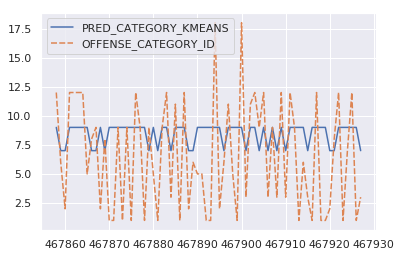

In [73]:
seaset(style = "darkgrid")
lineplot(data = df_norm[["PRED_CATEGORY_KMEANS", "OFFENSE_CATEGORY_ID"]].tail(70))

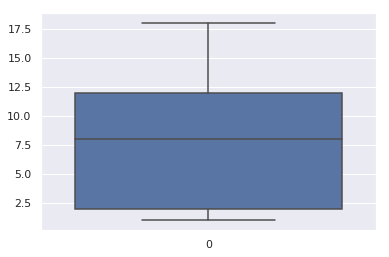

In [74]:
boxplot(data = df_norm["OFFENSE_CATEGORY_ID"])

In [83]:
cfl_sh = MeanShift()
cfl_sh.fit(x_now[:7000])
pass

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [84]:
pred = list(y_now)
pred.extend(cfl_sh.predict(x_fut))
df_norm["PRED_CATEGORY_MEANSH"] = pred

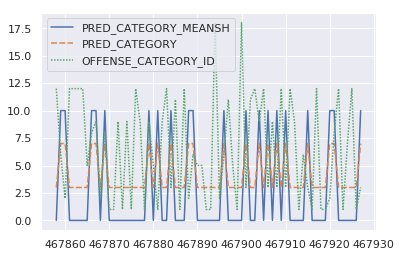

In [85]:
seaset(style = "darkgrid")
lineplot(data = df_norm[["PRED_CATEGORY_MEANSH", "PRED_CATEGORY", "OFFENSE_CATEGORY_ID"]].tail(70))